In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [127]:
loan_train = pd.read_csv(r'C:\Users\tcruickshan2\Documents\apf\datasets\Loan_Data\loan-train.csv')
loan_test = pd.read_csv(r'C:\Users\tcruickshan2\Documents\apf\datasets\Loan_Data\loan-test.csv')

In [128]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [129]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [130]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [131]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [132]:
#unique categories for each categorical column

for i in loan_train.select_dtypes(include='object').columns:
    print(f"{i} -> {loan_train[i].nunique()}")

Loan_ID -> 614
Gender -> 2
Married -> 2
Dependents -> 4
Education -> 2
Self_Employed -> 2
Property_Area -> 3
Loan_Status -> 2


In [133]:
for i in loan_test.select_dtypes(include='object').columns:
    print(f"{i} -> {loan_test[i].nunique()}")

Loan_ID -> 367
Gender -> 2
Married -> 2
Dependents -> 4
Education -> 2
Self_Employed -> 2
Property_Area -> 3


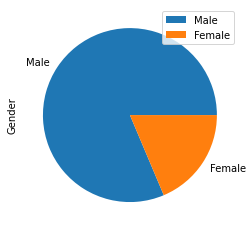

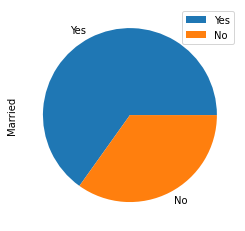

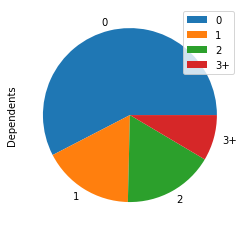

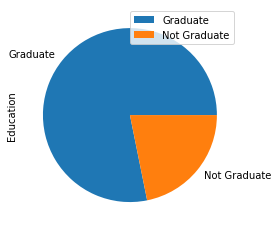

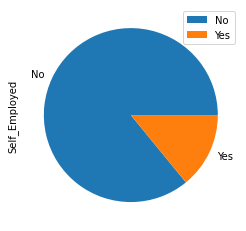

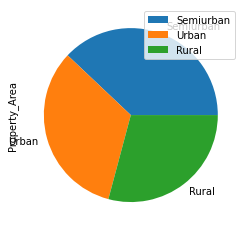

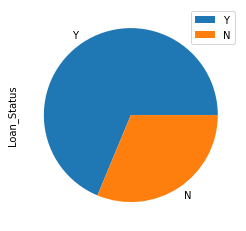

In [134]:
for featureName in loan_train.columns[1:]: #ignoring loanId
    explore_object_type(loan_train, str(featureName))

<AxesSubplot:xlabel='Property_Area'>

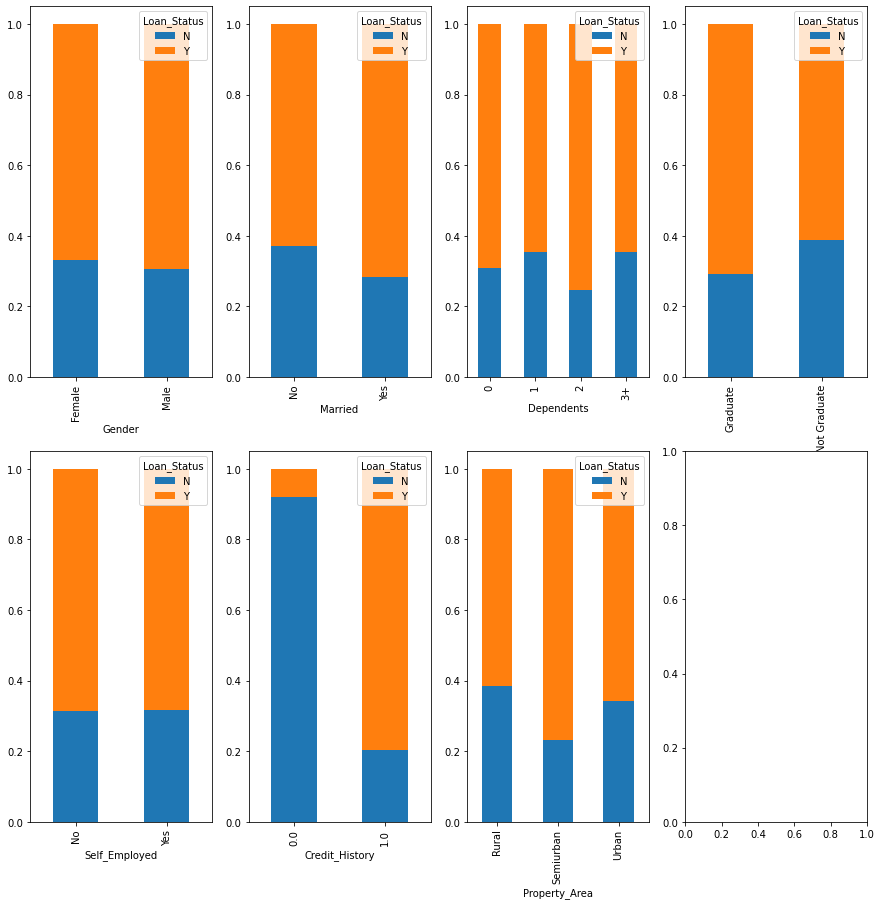

In [135]:
fig, ax = plt.subplots(2,4,figsize = (15,15))
Gender = pd.crosstab(loan_train['Gender'],loan_train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[0,0])

Married = pd.crosstab(loan_train['Married'],loan_train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,1])

Dependents = pd.crosstab(loan_train['Dependents'],loan_train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,2])

Education = pd.crosstab(loan_train['Education'],loan_train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[0,3])

Self_Employed = pd.crosstab(loan_train['Self_Employed'],loan_train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,0])

Credit_History = pd.crosstab(loan_train['Credit_History'],loan_train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,1])

Property_Area = pd.crosstab(loan_train['Property_Area'],loan_train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[1,2])

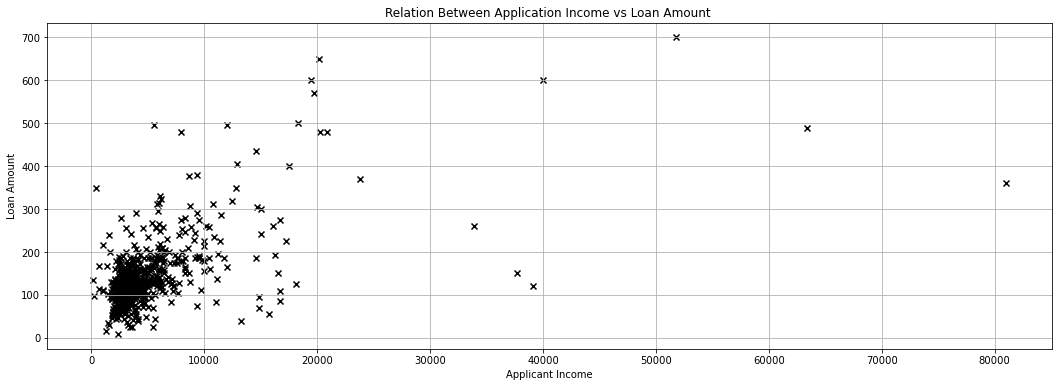

In [136]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Application Income vs Loan Amount ")

plt.grid()
plt.scatter(loan_train['ApplicantIncome'] , loan_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [137]:
loan_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [138]:
loan_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [139]:
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0], inplace=True) 

loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True) 
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(), inplace=True) 

loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace=True)
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0], inplace=True)

loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mean(), inplace=True)
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mean(), inplace=True)

In [140]:
loan_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [141]:
loan_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [142]:
def categorical_to_numerical(df ,feature_name):
    """
    #Convert the categorical data to numerical
    """    
    if df[feature_name].dtype ==  'object':
        df[feature_name] = pd.factorize(df[feature_name])[0]
        df = pd.get_dummies(df,drop_first=True)

In [143]:
for featureName in loan_train.columns[1:]: #ignoring loanId
    categorical_to_numerical(loan_train, str(featureName))
for featureName in loan_test.columns[1:]: #ignoring loanId
    categorical_to_numerical(loan_test, str(featureName))

In [144]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,0
1,LP001003,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,1
2,LP001005,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,0
3,LP001006,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,0
4,LP001008,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,0


In [145]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,0,0,0,0,5720,0,110.0,360.0,1.0,0
1,LP001022,0,0,1,0,0,3076,1500,126.0,360.0,1.0,0
2,LP001031,0,0,2,0,0,5000,1800,208.0,360.0,1.0,0
3,LP001035,0,0,2,0,0,2340,2546,100.0,360.0,1.0,0
4,LP001051,0,1,0,1,0,3276,0,78.0,360.0,1.0,0


<AxesSubplot:>

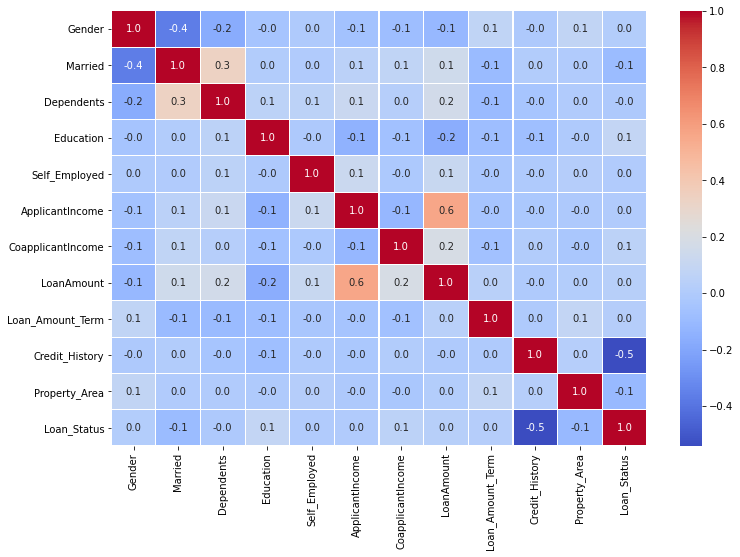

In [146]:
plt.figure(figsize=(12,8))


sns.heatmap(data=loan_train.corr(),cmap='coolwarm',annot=True,fmt='.1f',linewidths=.1)
#sns.heatmap(data=df.corr(),cmap='coolwarm',annot=True)